# Neural Network with one hidden layer

<center><img src="images/04-Neural Network with one hidden layer/one-hidden-layer.png" width = "400px"></center>

### Table of Contents

* [Recap](#chapter0)
* [1. Load the Dataset - Cat vs Dog](#chapter1)
    * [1.1 Load the Dataset](#section_1_1)
    * [1.2 Display the Data](#section_1_2)
    * [1.3 Flatten the data](#section_1_3)
    * [1.4 Normalize the data](#section_1_4)
* [2. Neural Network Model](#chapter2)
    * [2.1 Functions of our Neural Network ](#section_2_1)
        * [2.1.1 Layer Sizes](#section_2_1_1)
        * [2.1.2 Initialize Parameters](#section_2_1_2)
        * [2.1.3 Forward Propagation](#section_2_1_3)
        * [2.1.4 Cost function](#section_2_1_4)
        * [2.1.5 Backward Propagation](#section_2_1_5)
        * [2.1.6 Update parameters](#section_2_1_6)
    * [2.2 Model](#section_2_2)
* [3. ](#chapter3)


# Recap  <a class="anchor" id="chapter0"></a>

> Input layer :

$$ n_X = features \ | \ m = examples$$ 
$$X = \begin{bmatrix}  X^{(1)} &  X^{(2)} & .. & .. &  X^{(m)} \end{bmatrix}  \in  \mathbb{R^{n_X \times m}}$$  
$$ X^{(i)} \ \ i_{th} \ \ example $$

> Parameters :

$$ W^{[1]} \in (n_{[1]} \times n_X) $$ 
$$ b^{[1]} \in (n_{[1]} \times 1) $$ 
$$ W^{[2]} \in (n_{[2]} \times n_{[1]}) $$ 
$$ b^{[2]} \in (n_{[2]} \times 1) $$ 

In our case n[2] = 1 :

- One output unit

> Forward Propagation :

$$
\begin{cases}
    Z^{[1]} = W^{[1]} X + b^{[1]} \\
    A^{[1]} = g^{[1]}(Z^{[1]})  \\
    Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]} \\
    A^{[2]} = g^{[2]}(Z^{[2]})
\end{cases}
$$

- g is the activation function

> Backward Propagation :

$$
\begin{cases}
    dZ^{[2]} =  (A^{[2]} - Y) \\
    dW^{[2]} = \frac{1}{m} (A^{[2]} - Y)A^{[2]T} \\
    db^{[2]} = \frac{1}{m} \sum (A^{[2]} - Y)    \\
    dZ^{[1]} = W^{[2]T}dZ^{[2]} * g^{[1]'}(Z^{[1]}) \\
    dW^{[1]} = \frac{1}{m} dZ^{[1]} X^T\\
    db^{[1]} = \frac{1}{m} \sum  dZ^{[1]}
\end{cases}
$$

In this jupyter Notebook we will:

- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh
- Compute the cross entropy loss
- Implement forward and backward propagation


In [148]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

%matplotlib inline

# 1. Load the Dataset - Cat vs Dog <a class="anchor" id="chapter1"></a>

## 1.1 Load the Dataset <a class="anchor" id="section_1_1"></a>

In [3]:
# !pip install h5py

In [6]:
# function load data
import h5py

def load_data():
    train_dataset = h5py.File('datasets/02 - cat vs dog/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/02 - cat vs dog/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [7]:
# load data

X_train, y_train, X_test, y_test = load_data()

In [9]:
# Shape

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1000, 64, 64)
X_test shape: (200, 64, 64)
y_train shape: (1000, 1)
y_test shape: (200, 1)


In [11]:
# Data distribution

print("y_train Distribution",np.unique(y_train,return_counts=True))

y_train Distribution (array([0., 1.]), array([500, 500], dtype=int64))


The data are equally distributed.

## 1.2 Display the data  <a class="anchor" id="section_1_2"></a>

In [54]:
def display_data(X,y,n):
    """
    Display n random image in the dataset X,y

    ----
    Inputs:
    - X : Matrix containing the features and the examples
    - y : True label of the dataset X
    - n : number of images plot
    """
    # Random range
    random_range = np.random.randint(0,X.shape[0],size=n)

    # Classes
    classes = {0: "cat",1:"dog"}

    for i in random_range:
        plt.figure()
        plt.imshow(X[i], cmap="gray")
        plt.title(f"y={y[i,0]} | {classes[y[i,0]]}")
        plt.show()

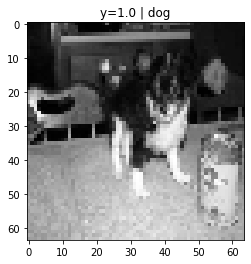

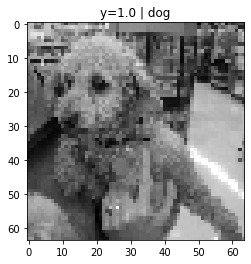

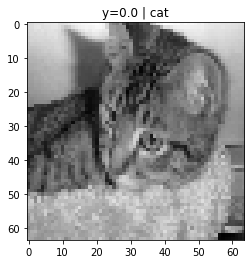

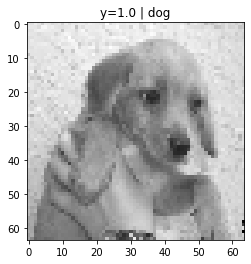

In [55]:
display_data(X_train,y_train,4)

## 1.3 Flatten the data <a class="anchor" id="section_1_3"></a>

$$ X \in (n_X \times m)$$

- n_x features
- m examples

In [61]:
# Flatten

X_train_flatten = X_train.reshape(X_train.shape[1] * X_train.shape[2],-1)
X_test_flatten =  X_test.reshape(X_test.shape[1] * X_test.shape[2],-1)

print("X_train flatten:", X_train_flatten.shape)
print("X_test flatten:", X_test_flatten.shape)

X_train flatten: (4096, 1000)
X_test flatten: (4096, 200)


## 1.4 Normalize the data <a class="anchor" id="section_1_4"></a>

In [63]:
X_train_flatten_norm = X_train_flatten/np.max(X_train_flatten)

# Warning: the data are normalized with the Training set
X_test_flatten_norm = X_test_flatten/np.max(X_train_flatten)

In [67]:
# Transpose y_train and y_test for our neural network 

y_train = y_train.T
y_test = y_test.T

# 2. Neural Network Model <a class="anchor" id="chapter2"></a>

## 2.1 Functions of our Neural Network <a class="anchor" id="section_2_1"></a>

### 2.1.1 Layer Sizes <a class="anchor" id="section_2_1_1"></a>

In [70]:
def layer_sizes(X,y,number_hidden_units):

    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]
    n_y = y.shape[0]
    n_h = number_hidden_units

    return n_x, n_y, n_h

In [72]:
# Test 

layer_sizes(X_train_flatten_norm, y_train, number_hidden_units=5)

(4096, 1, 5)

### 2.1.2 Initialize Parameters <a class="anchor" id="section_2_1_2"></a>

In [84]:
def initialize_parameters(n_x, n_y, n_h):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    

    # Initialize W1 and b1 
    W1 = np.random.randn(n_h,n_x) *0.01
    b1 = np.zeros((n_h,1))

    # Initializa W2 and b2
    W2 = np.random.randn(n_y,n_h) *0.01
    b2 = np.zeros((n_y,1))

    params = {"W1": W1,"W2": W2, "b1": b1, "b2": b2}
    return params

In [87]:
# test initialize parameters
n_x,n_y,n_h = 400, 1, 5
param_test = initialize_parameters(n_x, n_y, n_h)

print("W1 shape:", param_test["W1"].shape)
print("W2 shape:", param_test["W2"].shape)
print("b1 shape:", param_test["b1"].shape)
print("b2 shape:", param_test["b2"].shape)

W1 shape: (5, 400)
W2 shape: (1, 5)
b1 shape: (5, 1)
b2 shape: (1, 1)


### 2.1.3 Forward Propagation <a class="anchor" id="section_2_1_3"></a>

In [88]:
def forward_propagation(X,parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
   
    
    Returns:
    forward_prog -- python dictionary containing the activations
    
    """
    # Getting weights and bias
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Activation using tanh as activation function
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)

    Z2 = np.dot(W2,A1) + b2
    A2 = np.tanh(Z2)

    # forward results
    forward_prog = {"Z1":Z1, "A1":A1, "Z2":Z2,"A2": A2}

    return forward_prog

In [93]:
#-----------------------------
# TEST forward propagation

# initialize layers and examples
n_x,n_y,n_h = 400, 1, 5
m = 1000
X = np.random.randn(n_x,m)

# initialize parameters
param_test = initialize_parameters(n_x, n_y, n_h)

# forward propagation test
forward_dict = forward_propagation(X,param_test)

print(forward_dict["A1"].shape)
print(forward_dict["A2"].shape)


(5, 1000)
(1, 1000)


### 2.1.4 Cost function <a class="anchor" id="section_2_1_4"></a>

In [165]:
def cost_function(A2,y, parameters):
    """
    Computes the binary cross-entropy 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)

    """
    m = y.shape[1]

    # Compute the cost

    cost = (-1/m)*(np.dot(y,np.log(A2).T) + np.dot(1-y,np.log(1-A2).T))


    return np.squeeze(cost)

In [167]:
# -----------------------
# Test cost function

# initialize layers and examples
n_x,n_y,n_h = 400, 1, 5
m = 1000
X = np.random.randn(n_x,m)
y = np.random.randint(0,2,(1,m))

# initialize parameters
param_test = initialize_parameters(n_x, n_y, n_h)

# forward propagation test
forward_dict = forward_propagation(X,param_test)
A2 = forward_dict["A2"]

# cost
cost = cost_function(A2,y,param_test)
cost_log_loss = log_loss(y.T,A2.T)

print("cost :", cost)
print("cost log_loss:",cost_log_loss)

cost : nan
cost log_loss: 9.815283587780193


<ipython-input-165-ae7a638cdb07>:17: RuntimeWarning: invalid value encountered in log
  cost = (-1/m)*(np.dot(y,np.log(A2).T) + np.dot(1-y,np.log(1-A2).T))


### 2.1.5 Backward Propagation <a class="anchor" id="section_2_1-5"></a>

In [168]:
def backward_propagation(X,y,parameters,forward_dict):

    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    gradients -- python dictionary containing your gradients with respect to different parameters
    """

    gradients = {}

    return gradients

### 2.1.6 Update parameters <a class="anchor" id="section_2_1_6"></a>

In [171]:
def update_params(parameters,gradients, learning_rate=0.1):

    return 0

## 2.2 Model  <a class="anchor" id="section_2_2"></a>